In [1]:
!pip install -U imbalanced-learn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE 

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64


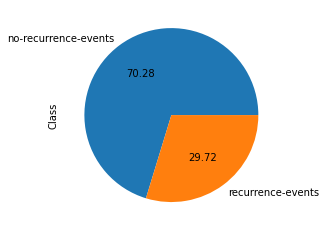

In [11]:
# Variáveis
col_names = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']
feature_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

data = pd.read_csv("./breast-cancer.csv", header=0, names=col_names)

print(data.Class.value_counts())
data.Class.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [12]:
# Pré-processamento
data = data.values

label_encoder = LabelEncoder()
for i in range(10):
    data[:,i] = label_encoder.fit_transform(data[:,i]).astype('int')
data = pd.DataFrame(data, columns=col_names)

X = data[feature_cols] # Atributos de entrada
Y = data.Class # Atributo de classificação
Y = Y.astype('int')

In [13]:
# Divisão dos dados de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 80/20

In [14]:
# Treinamento

# Naive Bayes
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

# Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

# Random Forest
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

DECISION TREE:


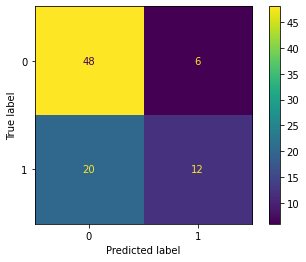

TPR: 0.8888888888888888
FNR: 0.1111111111111111
TNR: 0.17647058823529413
FPR: 0.625
Precision: 0.7058823529411765
F1 Score: 0.7868852459016393
Accuracy: 0.6976744186046512


In [15]:
# MATRIZ DE CONFUSÃO: DECISION TREE
print("DECISION TREE:")

matrix_clf = confusion_matrix(y_test.values, y_pred_clf)

disp_clf = ConfusionMatrixDisplay(confusion_matrix=matrix_clf, display_labels=clf.classes_)
disp_clf.plot()
plt.show()

TP_clf = matrix_clf[0][0]
TN_clf = matrix_clf[1][1]
FP_clf = matrix_clf[1][0]
FN_clf = matrix_clf[0][1]

print("TPR:", TP_clf/(TP_clf+FN_clf))
print("FNR:", FN_clf/(TP_clf+FN_clf))
print("TNR:", TN_clf/(TP_clf+FP_clf))
print("FPR:", FP_clf/(FP_clf+TN_clf))
print("Precision:", TP_clf/(TP_clf+FP_clf))
print("F1 Score:", (2*TP_clf)/(2*TP_clf+FP_clf+FN_clf))
print("Accuracy:", (TP_clf+TN_clf)/(TP_clf+TN_clf+FP_clf+FN_clf))

NAIVE BAYES:


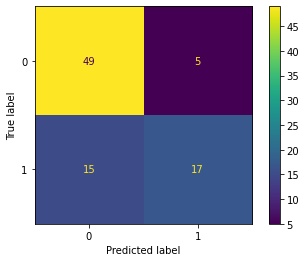

TPR: 0.9074074074074074
FNR: 0.09259259259259259
TNR: 0.265625
FPR: 0.46875
Precision: 0.765625
F1 Score: 0.8305084745762712
Accuracy: 0.7674418604651163


In [16]:
# MATRIZ DE CONFUSÃO: NAIVE BAYES
print("NAIVE BAYES:")

matrix_gnb = confusion_matrix(y_test.values, y_pred_gnb)

disp_gnb = ConfusionMatrixDisplay(confusion_matrix=matrix_gnb, display_labels=gnb.classes_)
disp_gnb.plot()
plt.show()

TP_gnb = matrix_gnb[0][0]
TN_gnb = matrix_gnb[1][1]
FP_gnb = matrix_gnb[1][0]
FN_gnb = matrix_gnb[0][1]

print("TPR:", TP_gnb/(TP_gnb+FN_gnb))
print("FNR:", FN_gnb/(TP_gnb+FN_gnb))
print("TNR:", TN_gnb/(TP_gnb+FP_gnb))
print("FPR:", FP_gnb/(FP_gnb+TN_gnb))
print("Precision:", TP_gnb/(TP_gnb+FP_gnb))
print("F1 Score:", (2*TP_gnb)/(2*TP_gnb+FP_gnb+FN_gnb))
print("Accuracy:", (TP_gnb+TN_gnb)/(TP_gnb+TN_gnb+FP_gnb+FN_gnb))

RANDOM FOREST


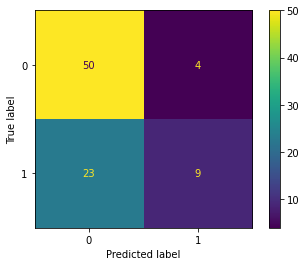

TPR: 0.9259259259259259
FNR: 0.07407407407407407
TNR: 0.1232876712328767
FPR: 0.71875
Precision: 0.684931506849315
F1 Score: 0.7874015748031497
Accuracy: 0.686046511627907


In [17]:
# MATRIZ DE CONFUSÃO: RANDOM FOREST
print("RANDOM FOREST")

matrix_rfc = confusion_matrix(y_test.values, y_pred_rfc)

disp_rfc = ConfusionMatrixDisplay(confusion_matrix=matrix_rfc, display_labels=rfc.classes_)
disp_rfc.plot()
plt.show()

TP_rfc = matrix_rfc[0][0]
TN_rfc = matrix_rfc[1][1]
FP_rfc = matrix_rfc[1][0]
FN_rfc = matrix_rfc[0][1]

print("TPR:", TP_rfc/(TP_rfc+FN_rfc))
print("FNR:", FN_rfc/(TP_rfc+FN_rfc))
print("TNR:", TN_rfc/(TP_rfc+FP_rfc))
print("FPR:", FP_rfc/(FP_rfc+TN_rfc))
print("Precision:", TP_rfc/(TP_rfc+FP_rfc))
print("F1 Score:", (2*TP_rfc)/(2*TP_rfc+FP_rfc+FN_rfc))
print("Accuracy:", (TP_rfc+TN_rfc)/(TP_rfc+TN_rfc+FP_rfc+FN_rfc))

Before oversampling:
 0    147
1     53
Name: Class, dtype: int64


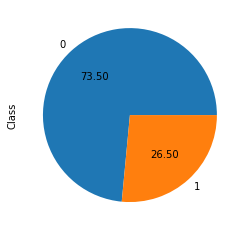

----
After oversampling:
 0    147
1    147
Name: Class, dtype: int64


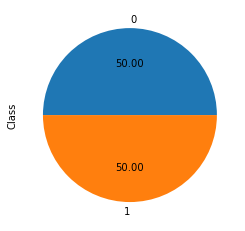

In [5]:
# Oversampling
print("Before oversampling:\n", y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()
print("----")

sm = SMOTE(random_state=12)
X_train,y_train = sm.fit_resample(X_train,y_train)

print("After oversampling:\n", y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [6]:
# Treinamento - Após Oversampling

# Naive Bayes
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

# Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

# Random Forest
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

DECISION TREE (Após Oversampling):


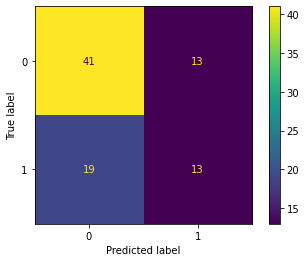

TPR: 0.7592592592592593
FNR: 0.24074074074074073
TNR: 0.21666666666666667
FPR: 0.59375
Precision: 0.6833333333333333
F1 Score: 0.7192982456140351
Accuracy: 0.627906976744186


In [7]:
# MATRIZ DE CONFUSÃO: DECISION TREE - Após Oversampling
print("DECISION TREE (Após Oversampling):")

matrix_clf = confusion_matrix(y_test.values, y_pred_clf)

disp_clf = ConfusionMatrixDisplay(confusion_matrix=matrix_clf, display_labels=clf.classes_)
disp_clf.plot()
plt.show()

TP_clf = matrix_clf[0][0]
TN_clf = matrix_clf[1][1]
FP_clf = matrix_clf[1][0]
FN_clf = matrix_clf[0][1]

print("TPR:", TP_clf/(TP_clf+FN_clf))
print("FNR:", FN_clf/(TP_clf+FN_clf))
print("TNR:", TN_clf/(TP_clf+FP_clf))
print("FPR:", FP_clf/(FP_clf+TN_clf))
print("Precision:", TP_clf/(TP_clf+FP_clf))
print("F1 Score:", (2*TP_clf)/(2*TP_clf+FP_clf+FN_clf))
print("Accuracy:", (TP_clf+TN_clf)/(TP_clf+TN_clf+FP_clf+FN_clf))

NAIVE BAYES (Após Oversampling):


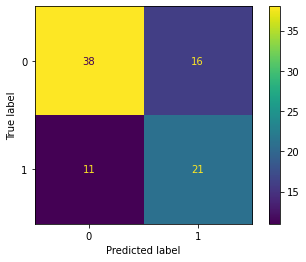

TPR: 0.7037037037037037
FNR: 0.2962962962962963
TNR: 0.42857142857142855
FPR: 0.34375
Precision: 0.7755102040816326
F1 Score: 0.7378640776699029
Accuracy: 0.686046511627907


In [8]:
# MATRIZ DE CONFUSÃO: NAIVE BAYES - Após Oversampling
print("NAIVE BAYES (Após Oversampling):")

matrix_gnb = confusion_matrix(y_test.values, y_pred_gnb)

disp_gnb = ConfusionMatrixDisplay(confusion_matrix=matrix_gnb, display_labels=gnb.classes_)
disp_gnb.plot()
plt.show()

TP_gnb = matrix_gnb[0][0]
TN_gnb = matrix_gnb[1][1]
FP_gnb = matrix_gnb[1][0]
FN_gnb = matrix_gnb[0][1]

print("TPR:", TP_gnb/(TP_gnb+FN_gnb))
print("FNR:", FN_gnb/(TP_gnb+FN_gnb))
print("TNR:", TN_gnb/(TP_gnb+FP_gnb))
print("FPR:", FP_gnb/(FP_gnb+TN_gnb))
print("Precision:", TP_gnb/(TP_gnb+FP_gnb))
print("F1 Score:", (2*TP_gnb)/(2*TP_gnb+FP_gnb+FN_gnb))
print("Accuracy:", (TP_gnb+TN_gnb)/(TP_gnb+TN_gnb+FP_gnb+FN_gnb))

RANDOM FOREST (Após Oversampling):


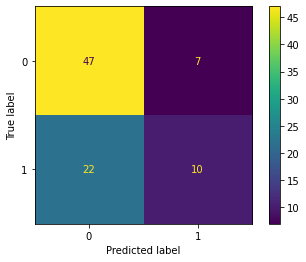

TPR: 0.8703703703703703
FNR: 0.12962962962962962
TNR: 0.14492753623188406
FPR: 0.6875
Precision: 0.6811594202898551
F1 Score: 0.7642276422764228
Accuracy: 0.6627906976744186


In [9]:
# MATRIZ DE CONFUSÃO: RANDOM FOREST - Após Oversampling
print("RANDOM FOREST (Após Oversampling):")

matrix_rfc = confusion_matrix(y_test.values, y_pred_rfc)

disp_rfc = ConfusionMatrixDisplay(confusion_matrix=matrix_rfc, display_labels=rfc.classes_)
disp_rfc.plot()
plt.show()

TP_rfc = matrix_rfc[0][0]
TN_rfc = matrix_rfc[1][1]
FP_rfc = matrix_rfc[1][0]
FN_rfc = matrix_rfc[0][1]

print("TPR:", TP_rfc/(TP_rfc+FN_rfc))
print("FNR:", FN_rfc/(TP_rfc+FN_rfc))
print("TNR:", TN_rfc/(TP_rfc+FP_rfc))
print("FPR:", FP_rfc/(FP_rfc+TN_rfc))
print("Precision:", TP_rfc/(TP_rfc+FP_rfc))
print("F1 Score:", (2*TP_rfc)/(2*TP_rfc+FP_rfc+FN_rfc))
print("Accuracy:", (TP_rfc+TN_rfc)/(TP_rfc+TN_rfc+FP_rfc+FN_rfc))

In [15]:
# Mostrando a árvore
# fig = plt.figure(figsize=(96,54))
# _ = tree.plot_tree(clf, feature_names=list(X_train.columns), class_names='Class', filled='true')